In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
vasaloppet = pd.read_csv("../data/vasaloppet_2023.csv")
vasaloppet.head()

,Name,Team,Age class,Place (gender),Time
0,"Persson, Emil (SWE)",Lager 157 Ski Team,H21,1,03:37:43
1,"Fleten, Emilie (NOR)",Team Ramudden,D21,1,04:04:08
2,"Nygaard, Andreas (NOR)",Team Ragde Charge,H21,2,03:37:43
3,"Öyre Slind, Silje (NOR)",Team Aker Daehlie,D35,2,04:06:41
4,"Stadaas, Kasper (NOR)",Team Ragde Charge,H21,3,03:37:44


In [3]:
#vasaloppet.Time = pd.to_timedelta(vasaloppet.Time)

In [4]:
vasaloppet[["hours", "minutes", "seconds"]] = vasaloppet.Time.str.split(":", expand=True)
vasaloppet.head()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds
0,"Persson, Emil (SWE)",Lager 157 Ski Team,H21,1,03:37:43,03,37,43
1,"Fleten, Emilie (NOR)",Team Ramudden,D21,1,04:04:08,04,04,08
2,"Nygaard, Andreas (NOR)",Team Ragde Charge,H21,2,03:37:43,03,37,43
3,"Öyre Slind, Silje (NOR)",Team Aker Daehlie,D35,2,04:06:41,04,06,41
4,"Stadaas, Kasper (NOR)",Team Ragde Charge,H21,3,03:37:44,03,37,44


In [5]:
vasaloppet["time_hours"] = vasaloppet["hours"].astype(float) + vasaloppet["minutes"].astype(float) / 60 + vasaloppet["seconds"].astype(float) / (60*60)
vasaloppet.head()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds,time_hours
0,"Persson, Emil (SWE)",Lager 157 Ski Team,H21,1,03:37:43,03,37,43,3.628611
1,"Fleten, Emilie (NOR)",Team Ramudden,D21,1,04:04:08,04,04,08,4.068889
2,"Nygaard, Andreas (NOR)",Team Ragde Charge,H21,2,03:37:43,03,37,43,3.628611
3,"Öyre Slind, Silje (NOR)",Team Aker Daehlie,D35,2,04:06:41,04,06,41,4.111389
4,"Stadaas, Kasper (NOR)",Team Ragde Charge,H21,3,03:37:44,03,37,44,3.628889


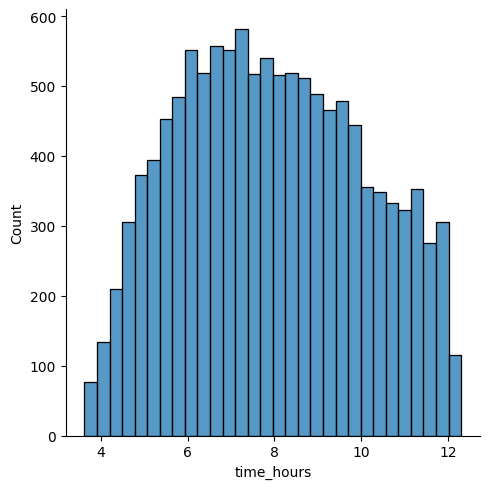

In [6]:
sns.displot(data=vasaloppet, x="time_hours")

In [7]:
vasaloppet["gender"] = vasaloppet["Age class"].str[0]
vasaloppet.tail()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds,time_hours,gender
12073,"Irborg, Måns (SWE)",Arboga SK,H21,9992,12:14:04,12,14,04,12.234444,H
12074,"Tuborgh, Kasper (DEN)","<span class=""text-muted"">–</span>",H21,9993,12:14:26,12,14,26,12.240556,H
12075,"Norberg, Lars (SWE)",Matfors SK,H50,9994,12:16:57,12,16,57,12.282500,H
12076,"Einarsson, Martin (SWE)",AXA SC,H21,9995,12:17:42,12,17,42,12.295000,H
12077,"Nguyen, Dan (SWE)",AXA SC,H21,9996,12:17:43,12,17,43,12.295278,H


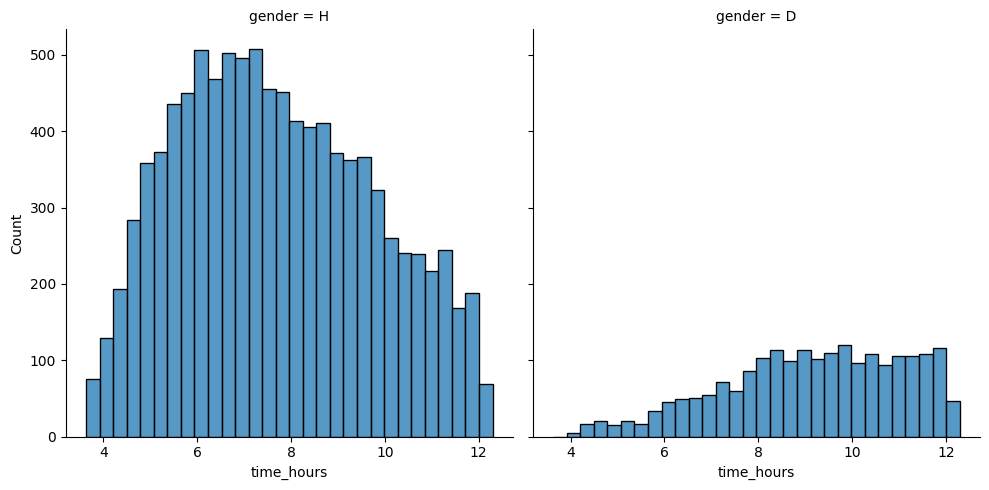

In [8]:
sns.displot(data=vasaloppet.loc[vasaloppet.gender != "<"], x="time_hours", col="gender")

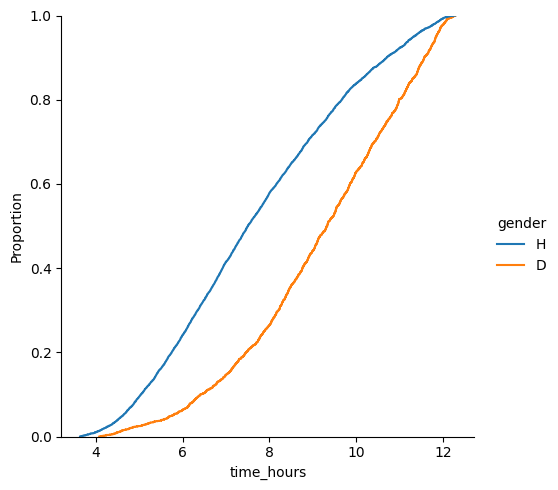

In [9]:
sns.displot(data=vasaloppet.loc[vasaloppet.gender != "<"], x="time_hours", hue="gender", kind="ecdf")

In [10]:
vasaloppet["Place (total)"] = vasaloppet["time_hours"].rank(method="first")
vasaloppet.sort_values("time_hours").tail()

,Name,Team,Age class,Place (gender),Time,hours,minutes,seconds,time_hours,gender,Place (total)
4163,"Johnsson, Emma (SWE)",Bravura Sports Club,D21,2082,12:16:56,12,16,56,12.282222,D,12074.0
12075,"Norberg, Lars (SWE)",Matfors SK,H50,9994,12:16:57,12,16,57,12.282500,H,12075.0
12076,"Einarsson, Martin (SWE)",AXA SC,H21,9995,12:17:42,12,17,42,12.295000,H,12076.0
4165,"Tran, Phiphi (SWE)",AXA SC,D21,2083,12:17:43,12,17,43,12.295278,D,12077.0
12077,"Nguyen, Dan (SWE)",AXA SC,H21,9996,12:17:43,12,17,43,12.295278,H,12078.0


# Apply seeding table for 2024

https://vasaloppet.se/wp-content/uploads/sites/1/2023/03/seedning_vl_vinterveckan_2023_2023-03-07.pdf

In [16]:
seedning_2024 = pd.DataFrame({
    "SL": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "hours":   [ 4,  4,  5,  5,  6,  7,  7,  8, 10, 12],
    "minutes": [ 5, 36,  2, 44, 27,  9, 54, 44,  1, 17],
    "seconds": [49, 54, 15, 42, 56, 40,  1, 48, 26, 43]
}).set_index("SL")

In [17]:
seedning_2024["time_hours"] = seedning_2024["hours"] + seedning_2024["minutes"] / 60 + seedning_2024["seconds"] / (60*60)

In [18]:
seedning_2024

,hours,minutes,seconds,time_hours
SL,,,,
0,4,5,49,4.096944
1,4,36,54,4.615000
2,5,2,15,5.037500
3,5,44,42,5.745000
4,6,27,56,6.465556
5,7,9,40,7.161111
6,7,54,1,7.900278
7,8,44,48,8.746667
8,10,1,26,10.023889


In [23]:
conditions = [
    vasaloppet["time_hours"] < seedning_2024["time_hours"].iloc[i] 
    for i in range(10)
]

In [28]:
vasaloppet["SL2024"] = np.select(
    conditions, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], default=10)

In [31]:
vasaloppet["SL2024"].value_counts()

9     2360
8     2091
7     1497
6     1386
5     1328
4     1310
3     1051
2      523
1      380
0      150
10       2
Name: SL2024, dtype: int64

In [32]:
vasaloppet["time_hours"].max()

12.295277777777777

In [33]:
vasaloppet["SL2024"].value_counts() / vasaloppet.shape[0]

9     0.195397
8     0.173125
7     0.123944
6     0.114754
5     0.109952
4     0.108462
3     0.087018
2     0.043302
1     0.031462
0     0.012419
10    0.000166
Name: SL2024, dtype: float64